Checking perforamce on logistic regression and SVM with given features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.notebook_repr_html", False)
%matplotlib inline

In [2]:
df = pd.read_csv("../data/interim/170308/dataframes/canon_1837_19295_labelled.csv")
df.head()

                     id  Unnamed: 0     accum          area  base_frame  \
0  f0003269_x0145_y0374           0  0.517857  14526.724430        3269   
1  f0003273_x0336_y0308           4  0.479592  14526.724430        3273   
2  f0003277_x0542_y0227           8  0.459239  12867.963509        3277   
3  f0003281_x0800_y0119          12  0.444767  11309.733553        3281   
4  f0003285_x1121_y0006          16  0.344828   5026.548246        3285   

   blue_pix  frac_blue_area  frac_r_y  frac_red_area  frame_num        lat  \
0     10082        0.694031         0       0.216016       3023  52.492708   
1      9817        0.675789         0       0.234051       3027  52.492714   
2      8400        0.652784         0       0.238499       3031  52.492719   
3      7416        0.655718         0       0.252880       3035  52.492724   
4      1543        0.306970         6       0.157563       3039  52.492730   

         lon  radius  red_pix     x    y is_sign  
0  13.353503      68     3138

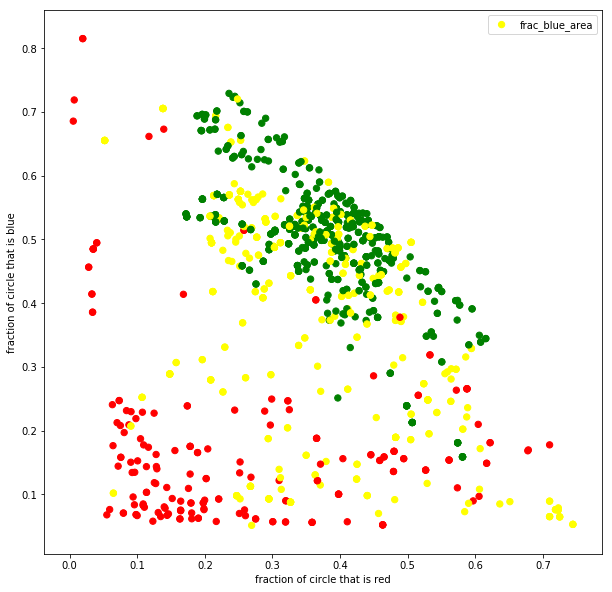

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
colors = {"good":'green', "poor":"yellow", "not":'red'}
ax.scatter(df['frac_red_area'], df['frac_blue_area'], s=40, c=df['is_sign'].apply(lambda x: colors[x]))
plt.xlabel("fraction of circle that is red")
plt.ylabel("fraction of circle that is blue")
plt.legend()
plt.show()
#fig.savefig("frac_blue_area_vs_frac_red_area.png")

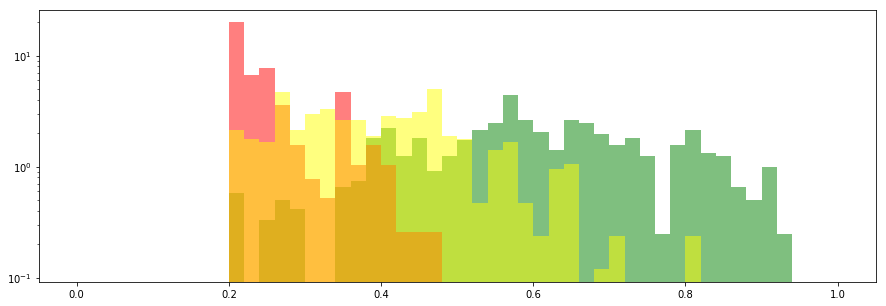

In [4]:
# accumulator value returned by Hough transform (~how "circular" circle is)
groups = df.groupby('is_sign')
bins = np.linspace(0, 1, 51)
plt.figure(figsize=(15,5))
for name, group in groups:                                             
    x = group["accum"].reset_index(drop=True)
    plt.hist(x, bins=bins, normed=1, log=True, color=colors[name], alpha=0.5)  

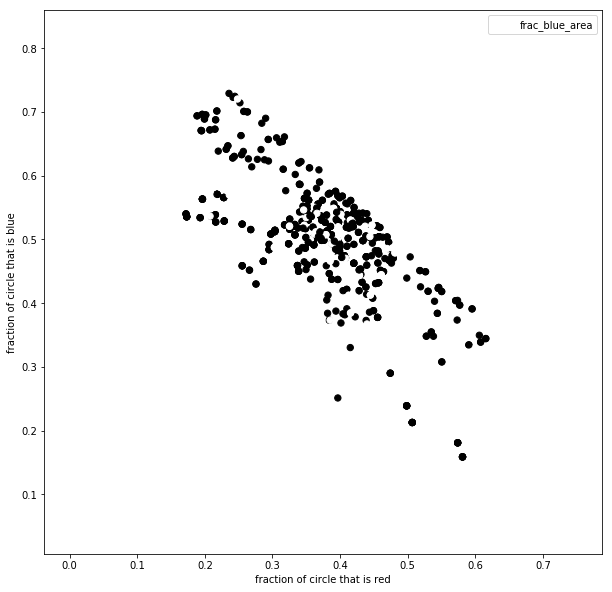

In [5]:
#only plot "sign" "not_sign"
fig, ax = plt.subplots(figsize=(10,10))
colors = {"good":'black', "poor":"white", "not":'white'}
ax.scatter(df['frac_red_area'], df['frac_blue_area'], s=40, c=df['is_sign'].apply(lambda x: colors[x]))
plt.xlabel("fraction of circle that is red")
plt.ylabel("fraction of circle that is blue")
plt.legend()
plt.show()
#fig.savefig("frac_blue_area_vs_frac_red_area.png")

/Users/markhashimoto/anaconda/envs/cv_py27_2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/markhashimoto/anaconda/envs/cv_py27_2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


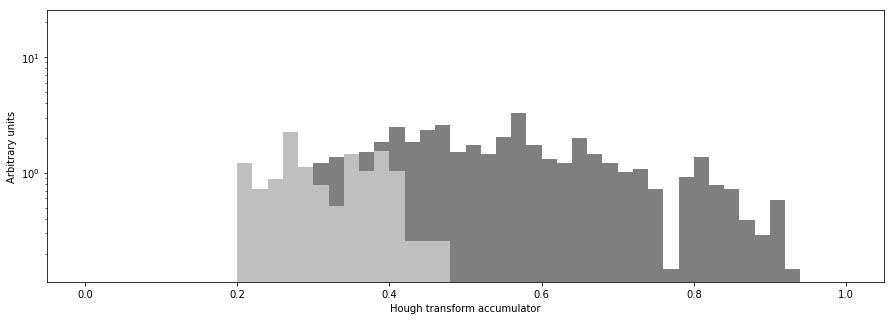

In [6]:
df["is_sign"].loc[df["is_sign"]=="poor"] = "good"
groups = df.groupby('is_sign')
bins = np.linspace(0, 1, 51)
plt.figure(figsize=(15,5))
for name, group in groups:                                             
    x = group["accum"].reset_index(drop=True)
    plt.xlabel("Hough transform accumulator")
    plt.ylabel("Arbitrary units")
    plt.legend()
    plt.hist(x, bins=bins, normed=1, log=True, color=colors[name], alpha=0.5)  

# Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split                           
from sklearn import preprocessing                                              
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression                            

In [9]:
y = df["is_sign"]
y.loc[y=="poor"] = 1
y.loc[y=="good"] = 1
y.loc[y=="not"] = 0
y = np.asarray(y, dtype="int8")
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [10]:
X = df[["frac_red_area", "frac_blue_area", "accum"]]
X.head()

   frac_red_area  frac_blue_area     accum
0       0.216016        0.694031  0.517857
1       0.234051        0.675789  0.479592
2       0.238499        0.652784  0.459239
3       0.252880        0.655718  0.444767
4       0.157563        0.306970  0.344828

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.50, random_state=3)
X_train.head()

      frac_red_area  frac_blue_area     accum
371        0.297561        0.508550  0.562500
399        0.290193        0.527422  0.572674
623        0.462942        0.052322  0.211207
1002       0.260008        0.066729  0.285714
1134       0.621699        0.181238  0.258621

In [12]:
y_train

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)                           
X_train = scaler.transform(X_train)                                            
X_test = scaler.transform(X_test)   
X_train

array([[-0.41215007,  0.54567501,  0.49968293],
       [-0.46597371,  0.653714  ,  0.55521022],
       [ 0.79594118, -2.06614782, -1.41751288],
       ..., 
       [ 0.22771617, -0.22793479,  0.79373137],
       [ 0.19001737,  0.71613357,  0.89463641],
       [-0.74009555,  0.92941259, -0.38283578]])

In [14]:
y_test = np.array(y_test)
y_train = np.array(y_train)
y_train

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [19]:
# run one logistic regression
clf = LogisticRegression(C=1e-10, penalty='l2', tol=1e-6)
clf.fit(X_train, y_train)
cm = confusion_matrix(y_test, clf.predict(X_test))                         
n_neg = np.sum(y_test==0)
n_pos = np.sum(y_test==1)
n = len(y_test)
print("number negatives in y_test: %d or %2.0f percent" % (n_neg, float(n_neg)/float(n)*100))
print("number positives in y_test: %d or %2.0f percent" % (n_pos, float(n_pos)/n * 100))
print("True positives: {}".format(float(cm[1,1]) / n_pos))                        
print("False negatives: {}".format(float(cm[1,0]) / n_pos))                       
print("True negatives: {}".format(float(cm[0,0]) / n_neg))                        
print("False positives: {}".format(float(cm[0,1]) / n_neg))    

number negatives in y_test: 95 or 16 percent
number positives in y_test: 515 or 84 percent
True positives: 0.902912621359
False negatives: 0.0970873786408
True negatives: 0.736842105263
False positives: 0.263157894737


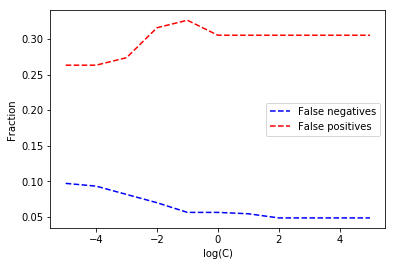

In [20]:
# scan regularisration param space and inspect ROC curves
from sklearn.metrics import roc_curve, auc
from collections import OrderedDict
                                                                               
cs = np.logspace(-5, 5, num=11) #regularisation parameters                     
tn=[]; fn=[]; fp=[]; tp=[]; #to store % true/false negatives/positives 
fpr = OrderedDict()
tpr = OrderedDict()
roc_auc = OrderedDict()

clf = LogisticRegression(C=1.0, penalty='l2', tol=1e-6)                       
for c in cs:                                                                   
    
    clf.set_params(C=c)                                                       
    clf.fit(X_train, y_train)                                                  
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    fpr[c], tpr[c], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])
    
    cm = confusion_matrix(y_test, clf.predict(X_test))                         
    tp.append(float(cm[1,1]) / n_pos)                                                 
    fn.append(float(cm[1,0]) / n_pos)                                                 
    tn.append(float(cm[0,0]) / n_neg)                                                 
    fp.append(float(cm[0,1]) / n_neg)                                                 
                                                                               
#plt.plot(np.log10(cs), tp, 'b', label='True positives')                        
plt.plot(np.log10(cs), fn, 'b--', label='False negatives')                     
#plt.plot(np.log10(cs), tn, 'r', label='True negatives')                        
plt.plot(np.log10(cs), fp, 'r--', label='False positives')                     
plt.xlabel('log(C)')                                                           
plt.ylabel('Fraction')                                                         
plt.legend()  

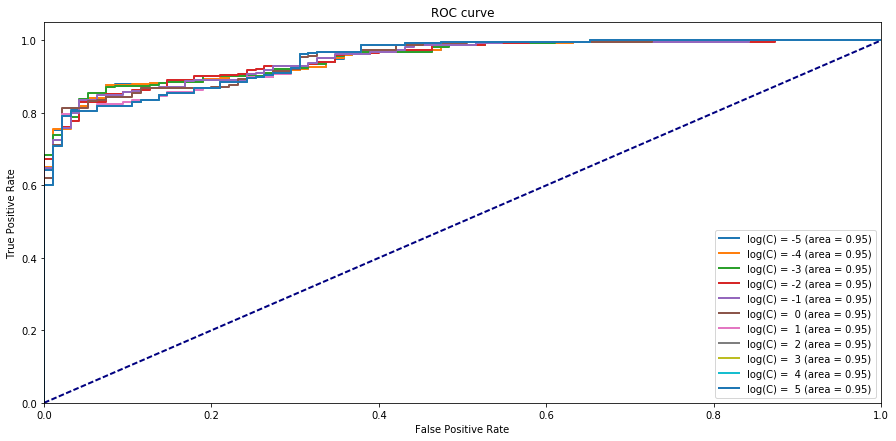

In [21]:
plt.figure(figsize=(15,7))
lw = 2
for key in fpr.keys():
    label = 'log(C) = %2.0f (area = %0.2f)' % (np.log10(key), roc_auc[key])
    plt.plot(fpr[key], tpr[key], lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
fpr_logreg = fpr[1]
tpr_logreg = tpr[1]

# Support Vector Machine RBF

In [24]:
# run one SVM
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)
cm = confusion_matrix(y_test, clf.predict(X_test))                         
n_neg = np.sum(y_test==0)
n_pos = np.sum(y_test==1)
n = len(y_test)
print("number negatives in y_test: %d or %2.0f percent" % (n_neg, float(n_neg)/float(n)*100))
print("number positives in y_test: %d or %2.0f percent" % (n_pos, float(n_pos)/n * 100))
print("True positives: {}".format(float(cm[1,1]) / n_pos))                        
print("False negatives: {}".format(float(cm[1,0]) / n_pos))                       
print("True negatives: {}".format(float(cm[0,0]) / n_neg))                        
print("False positives: {}".format(float(cm[0,1]) / n_neg))    

number negatives in y_test: 95 or 16 percent
number positives in y_test: 515 or 84 percent
True positives: 0.955339805825
False negatives: 0.0446601941748
True negatives: 0.684210526316
False positives: 0.315789473684


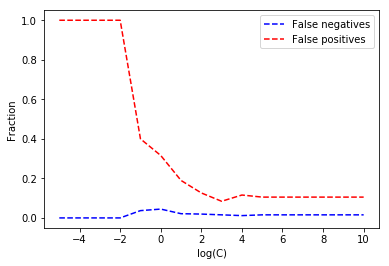

In [26]:
# scan regularisration param space and inspect ROC curves
from sklearn.metrics import roc_curve, auc
from collections import OrderedDict
                                                                               
cs = np.logspace(-5, 10, num=16) #regularisation parameters                     
tn=[]; fn=[]; fp=[]; tp=[]; #to store % true/false negatives/positives 
fpr = OrderedDict()
tpr = OrderedDict()
roc_auc = OrderedDict()
for c in cs:                                                                   
    
    clf.set_params(C=c)                                                       
    clf.fit(X_train, y_train)                                                  
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    fpr[c], tpr[c], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])
    
    cm = confusion_matrix(y_test, clf.predict(X_test))                         
    tp.append(float(cm[1,1]) / n_pos)                                                 
    fn.append(float(cm[1,0]) / n_pos)                                                 
    tn.append(float(cm[0,0]) / n_neg)                                                 
    fp.append(float(cm[0,1]) / n_neg)                                                 
                                                                               
#plt.plot(np.log10(cs), tp, 'b', label='True positives')                        
plt.plot(np.log10(cs), fn, 'b--', label='False negatives')                     
#plt.plot(np.log10(cs), tn, 'r', label='True negatives')                        
plt.plot(np.log10(cs), fp, 'r--', label='False positives')                     
plt.xlabel('log(C)')                                                           
plt.ylabel('Fraction')                                                         
plt.legend()  

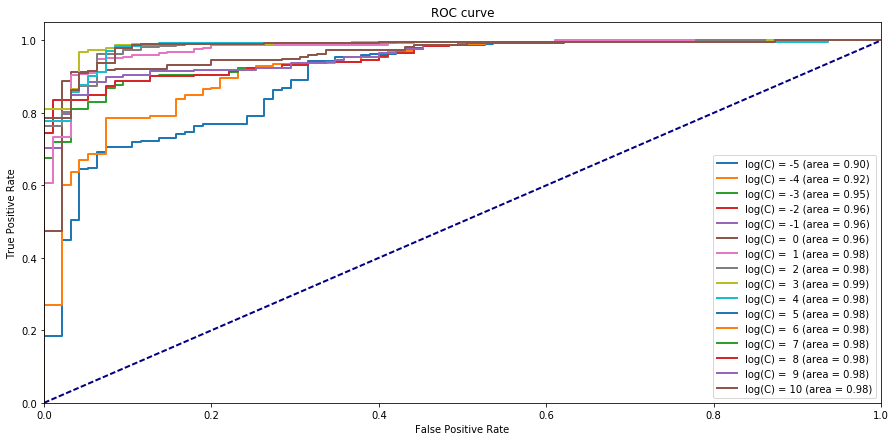

In [27]:
plt.figure(figsize=(15,7))
lw = 2
for key in fpr.keys():
    label = 'log(C) = %2.0f (area = %0.2f)' % (np.log10(key), roc_auc[key])
    plt.plot(fpr[key], tpr[key], lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine linear

In [28]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")

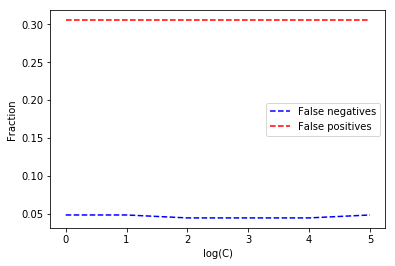

In [29]:
# scan regularisration param space and inspect ROC curves
from sklearn.metrics import roc_curve, auc
from collections import OrderedDict
                                                                               
cs = np.logspace(0, 5, num=6) #regularisation parameters                     
tn=[]; fn=[]; fp=[]; tp=[]; #to store % true/false negatives/positives 
fpr = OrderedDict()
tpr = OrderedDict()
roc_auc = OrderedDict()
for c in cs:                                                                   
    
    clf.set_params(C=c)                                                       
    clf.fit(X_train, y_train)                                                  
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    fpr[c], tpr[c], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])
    
    cm = confusion_matrix(y_test, clf.predict(X_test))                         
    tp.append(float(cm[1,1]) / n_pos)                                                 
    fn.append(float(cm[1,0]) / n_pos)                                                 
    tn.append(float(cm[0,0]) / n_neg)                                                 
    fp.append(float(cm[0,1]) / n_neg)                                                 
                                                                               
#plt.plot(np.log10(cs), tp, 'b', label='True positives')                        
plt.plot(np.log10(cs), fn, 'b--', label='False negatives')                     
#plt.plot(np.log10(cs), tn, 'r', label='True negatives')                        
plt.plot(np.log10(cs), fp, 'r--', label='False positives')                     
plt.xlabel('log(C)')                                                           
plt.ylabel('Fraction')                                                         
plt.legend()  

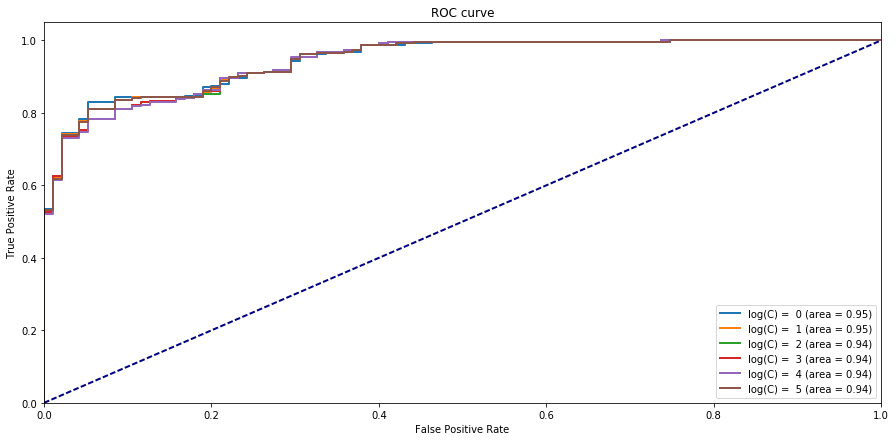

In [30]:
plt.figure(figsize=(15,7))
lw = 2
for key in fpr.keys():
    label = 'log(C) = %2.0f (area = %0.2f)' % (np.log10(key), roc_auc[key])
    plt.plot(fpr[key], tpr[key], lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
fpr_svm = fpr[10e4]
tpr_svm = tpr[10e4]

# Load fpr and tpr for VGG + SVM linear kernel that were run on AWS to make some plots for presentation

In [33]:
import pickle
fpr = pickle.load( open( "../models/vgg_svm_lin_model/vgg_svm_lin_model_fpr.p", "rb" ))
tpr = pickle.load( open( "../models/vgg_svm_lin_model/vgg_svm_lin_model_tpr.p", "rb" ))

In [34]:
fpr_vgg_svm = fpr[1]
tpr_vgg_svm = tpr[1]

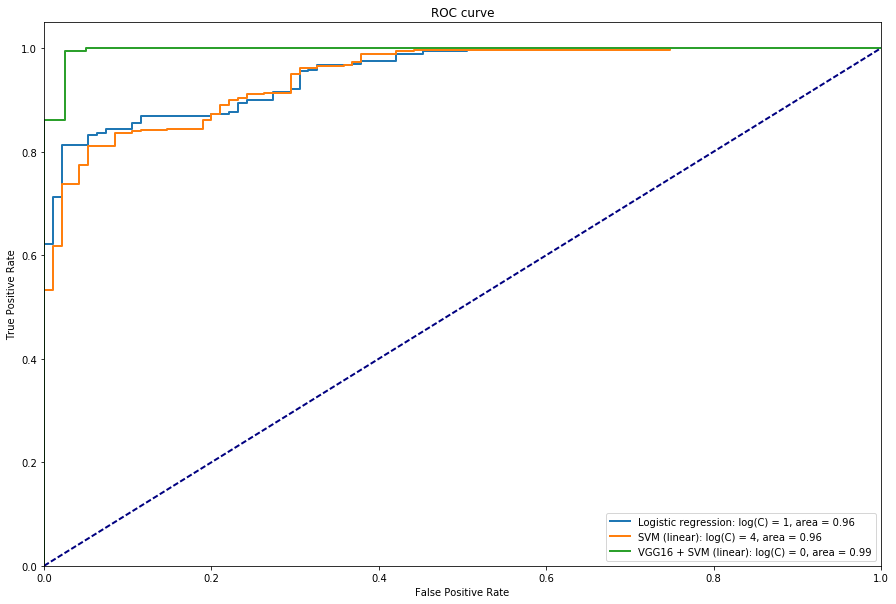

In [35]:
plt.figure(figsize=(15,10))
lw = 2

#logistic regression
label = 'Logistic regression: log(C) = 1, area = 0.96'
plt.plot(fpr_logreg, tpr_logreg, lw=lw, label=label)
#SVM
label = 'SVM (linear): log(C) = 4, area = 0.96'
plt.plot(fpr_svm, tpr_svm, lw=lw, label=label)
#VGG16 + SVM
label = 'VGG16 + SVM (linear): log(C) = 0, area = 0.99'
plt.plot(fpr_vgg_svm, tpr_vgg_svm, lw=lw, label=label)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

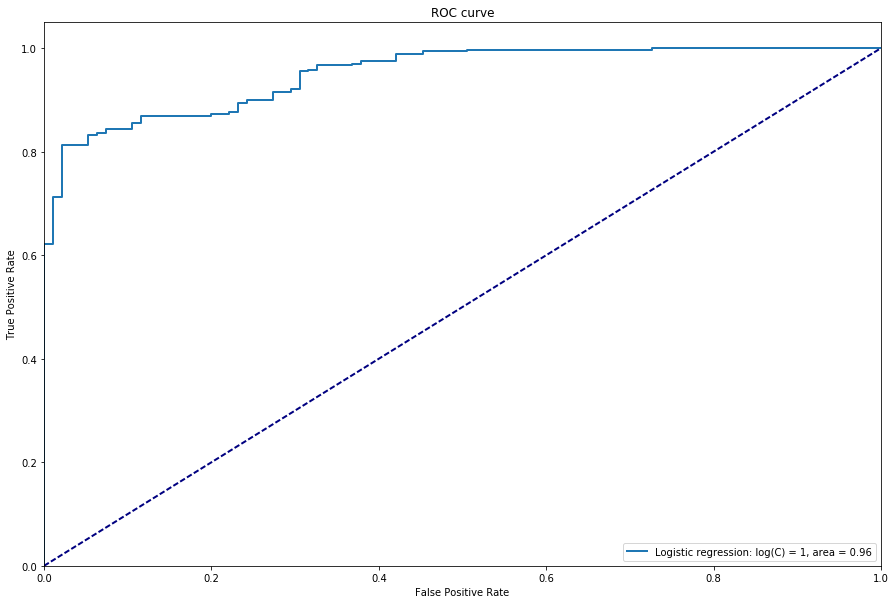

In [36]:
plt.figure(figsize=(15,10))
lw = 2

#logistic regression
label = 'Logistic regression: log(C) = 1, area = 0.96'
plt.plot(fpr_logreg, tpr_logreg, lw=lw, label=label)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

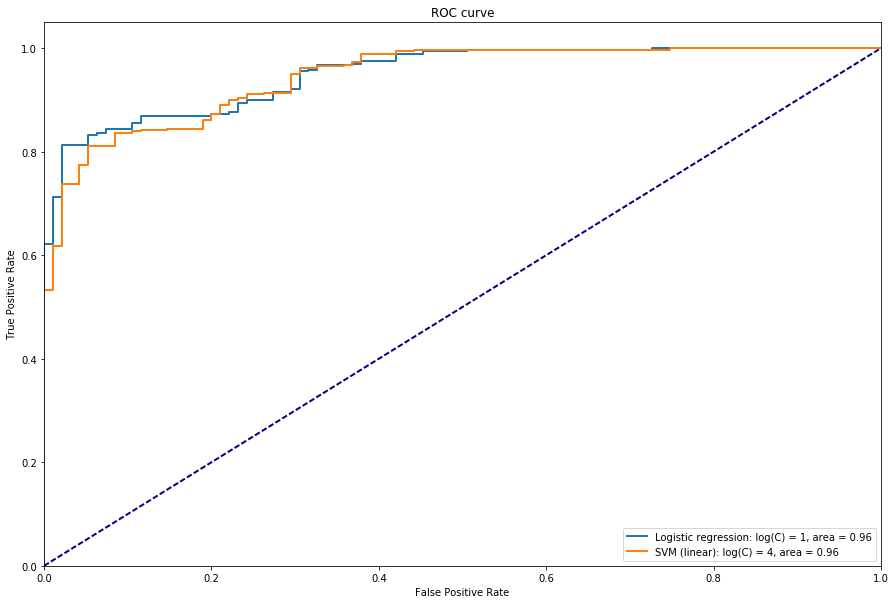

In [37]:
plt.figure(figsize=(15,10))
lw = 2

#logistic regression
label = 'Logistic regression: log(C) = 1, area = 0.96'
plt.plot(fpr_logreg, tpr_logreg, lw=lw, label=label)
#SVM
label = 'SVM (linear): log(C) = 4, area = 0.96'
plt.plot(fpr_svm, tpr_svm, lw=lw, label=label)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()